In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train=train[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

In [6]:
test=test[['Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

In [7]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [11]:
train=train[['Survived','Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']]
test=test[['Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']]

In [12]:
train['Age']=train['Age'].fillna(train.Age.mean())

C:\Users\Admin\AppData\Local\Temp\ipykernel_3256\1422831669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age']=train['Age'].fillna(train.Age.mean())


In [13]:
test['Age']=test['Age'].fillna(test.Age.mean())

C:\Users\Admin\AppData\Local\Temp\ipykernel_3256\3789910402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age']=test['Age'].fillna(test.Age.mean())


In [14]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Embarked    0
dtype: int64

In [15]:
train.dropna(axis=0,inplace=True)
test.dropna(axis=0,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3256\3714348981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(axis=0,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3256\3714348981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.dropna(axis=0,inplace=True)


In [16]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [17]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [18]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [19]:
train=train[['Survived','Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']]
test=test[['Pclass',  'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

In [20]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [21]:
pd.get_dummies(train,prefix=['Sex'], columns = ['Sex'], drop_first=True)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
0,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C,0
2,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,S,0
4,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,S,1
887,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,S,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,S,0
889,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C,1


In [22]:
temp=pd.get_dummies(train,prefix=['Embarked'], columns = ['Embarked'], drop_first=True)
temp

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,0,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0,1
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,0,0


In [23]:
temp

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,0,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0,1
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,0,0


In [24]:
pd.get_dummies(test,prefix=['Sex'], columns = ['Sex'], drop_first=True)

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,3,34.50000,0,0,7.8292,Q,1
1,3,47.00000,1,0,7.0000,S,0
2,2,62.00000,0,0,9.6875,Q,1
3,3,27.00000,0,0,8.6625,S,1
4,3,22.00000,1,1,12.2875,S,0
...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,S,1
414,1,39.00000,0,0,108.9000,C,0
415,3,38.50000,0,0,7.2500,S,1
416,3,30.27259,0,0,8.0500,S,1


In [96]:
pd.get_dummies(test,prefix=['Embarked'], columns = ['Embarked'], drop_first=True)

,Pclass,Sex,Age,SibSp,Parch,Fare,Sex_LE,Embarked_LE,Age_MM,Fare_MM,Embarked_Q,Embarked_S
0,3,male,0.373932,0,0,-0.488579,1,1,-0.000579,-0.000954,1,0
1,3,female,1.338358,1,0,-0.505273,0,2,0.011540,-0.000986,0,1
2,2,male,2.495670,0,0,-0.451165,1,1,0.026083,-0.000881,1,0
3,3,male,-0.204724,0,0,-0.471802,1,2,-0.007850,-0.000921,0,1
4,3,female,-0.590495,1,1,-0.398819,0,2,-0.012698,-0.000778,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,0.047770,0,0,-0.484133,1,2,-0.004677,-0.000945,0,1
414,1,female,0.721125,0,0,1.546286,0,0,0.003784,0.003018,0,0
415,3,male,0.682548,0,0,-0.500240,1,2,0.003299,-0.000976,0,1
416,3,male,0.047770,0,0,-0.484133,1,2,-0.004677,-0.000945,0,1


In [97]:
le_sex=preprocessing.LabelEncoder()
le_Embarked=preprocessing.LabelEncoder()

In [98]:
le_sex.fit(train[['Sex']])

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [99]:
le_Embarked.fit(train[['Embarked']])

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [100]:
train[['Sex_LE']]

,Sex_LE
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [101]:
"BLR → BOM → DEL".split(' → ')

['BLR', 'BOM', 'DEL']

In [102]:
le_sex.inverse_transform(train[['Sex_LE']])

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'female', 'male', 'female', 'male', 'male', 'female',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female',
       'male', 'male', 'female', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male',
       '

In [103]:
train['Sex_LE']=le_sex.transform(train[['Sex']])

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [104]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_LE,Embarked_LE,Age_MM,Fare_MM
0,0,3,"Braund, Mr. Owen Harris",male,-0.590495,1,0,A/5 21171,-0.500240,S,1,2,-0.012698,-0.000976
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.643971,1,0,PC 17599,0.788947,C,0,0,0.002814,0.001540
2,1,3,"Heikkinen, Miss. Laina",female,-0.281878,0,0,STON/O2. 3101282,-0.486650,S,0,2,-0.008820,-0.000950
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.412509,1,0,113803,0.422861,S,0,2,-0.000094,0.000825
4,0,3,"Allen, Mr. William Henry",male,0.412509,0,0,373450,-0.484133,S,1,2,-0.000094,-0.000945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,-0.204724,0,0,211536,-0.384475,S,1,2,-0.007850,-0.000750
887,1,1,"Graham, Miss. Margaret Edith",female,-0.821957,0,0,112053,-0.042213,S,0,2,-0.015606,-0.000082
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.003524,1,2,W./C. 6607,-0.174084,S,0,2,-0.005233,-0.000340
889,1,1,"Behr, Mr. Karl Howell",male,-0.281878,0,0,111369,-0.042213,C,1,0,-0.008820,-0.000082


In [105]:
test['Sex_LE']=le_sex.transform(test[['Sex']])

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
train['Embarked_LE']=le_Embarked.transform(train[['Embarked']])

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
test['Embarked_LE']=le_Embarked.transform(test[['Embarked']])

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_LE,Embarked_LE,Age_MM,Fare_MM
0,0,3,"Braund, Mr. Owen Harris",male,-0.590495,1,0,A/5 21171,-0.500240,S,1,2,-0.012698,-0.000976
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.643971,1,0,PC 17599,0.788947,C,0,0,0.002814,0.001540
2,1,3,"Heikkinen, Miss. Laina",female,-0.281878,0,0,STON/O2. 3101282,-0.486650,S,0,2,-0.008820,-0.000950
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.412509,1,0,113803,0.422861,S,0,2,-0.000094,0.000825
4,0,3,"Allen, Mr. William Henry",male,0.412509,0,0,373450,-0.484133,S,1,2,-0.000094,-0.000945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,-0.204724,0,0,211536,-0.384475,S,1,2,-0.007850,-0.000750
887,1,1,"Graham, Miss. Margaret Edith",female,-0.821957,0,0,112053,-0.042213,S,0,2,-0.015606,-0.000082
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.003524,1,2,W./C. 6607,-0.174084,S,0,2,-0.005233,-0.000340
889,1,1,"Behr, Mr. Karl Howell",male,-0.281878,0,0,111369,-0.042213,C,1,0,-0.008820,-0.000082


In [109]:
train['Age'].describe()

count    8.890000e+02
mean     3.316932e-16
std      1.000563e+00
min     -2.255481e+00
25%     -5.904949e-01
50%      3.523727e-03
75%      4.125086e-01
max      3.884444e+00
Name: Age, dtype: float64

In [110]:
train['Fare'].describe()

count    8.890000e+02
mean     1.398706e-16
std      1.000563e+00
min     -6.462044e-01
25%     -4.872378e-01
50%     -3.551972e-01
75%     -2.207954e-02
max      9.668551e+00
Name: Fare, dtype: float64

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [112]:
Age_SS=StandardScaler()
Fare_SS=StandardScaler()

Age_MM=MinMaxScaler()
Fare_MM=MinMaxScaler()

In [113]:
Age_SS.fit(train[['Age']])
Fare_SS.fit(train[['Fare']])

StandardScaler()

In [114]:
Age_MM.fit(train[['Age']])
Fare_MM.fit(train[['Fare']])

MinMaxScaler()

In [115]:
train['Age']=Age_SS.transform(train[['Age']])
train['Fare']=Fare_SS.transform(train[['Fare']])
test['Age']=Age_SS.transform(test[['Age']])
test['Fare']=Fare_SS.transform(test[['Fare']])

In [116]:
train['Age_MM']=Age_MM.transform(train[['Age']])
train['Fare_MM']=Fare_MM.transform(train[['Fare']])
test['Age_MM']=Age_MM.transform(test[['Age']])
test['Fare_MM']=Fare_MM.transform(test[['Fare']])

In [117]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_LE,Embarked_LE,Age_MM,Fare_MM
0,0,3,"Braund, Mr. Owen Harris",male,-0.590495,1,0,A/5 21171,-0.500240,S,1,2,0.271174,0.014151
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.643971,1,0,PC 17599,0.788947,C,0,0,0.472229,0.139136
2,1,3,"Heikkinen, Miss. Laina",female,-0.281878,0,0,STON/O2. 3101282,-0.486650,S,0,2,0.321438,0.015469
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.412509,1,0,113803,0.422861,S,0,2,0.434531,0.103644
4,0,3,"Allen, Mr. William Henry",male,0.412509,0,0,373450,-0.484133,S,1,2,0.434531,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,-0.204724,0,0,211536,-0.384475,S,1,2,0.334004,0.025374
887,1,1,"Graham, Miss. Margaret Edith",female,-0.821957,0,0,112053,-0.042213,S,0,2,0.233476,0.058556
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.003524,1,2,W./C. 6607,-0.174084,S,0,2,0.367921,0.045771
889,1,1,"Behr, Mr. Karl Howell",male,-0.281878,0,0,111369,-0.042213,C,1,0,0.321438,0.058556


In [118]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_LE,Embarked_LE,Age_MM,Fare_MM
0,3,male,0.373932,0,0,-0.488579,Q,1,1,0.428248,0.015282
1,3,female,1.338358,1,0,-0.505273,S,0,2,0.585323,0.013663
2,2,male,2.495670,0,0,-0.451165,Q,1,1,0.773813,0.018909
3,3,male,-0.204724,0,0,-0.471802,S,1,2,0.334004,0.016908
4,3,female,-0.590495,1,1,-0.398819,S,0,2,0.271174,0.023984
...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,0.047770,0,0,-0.484133,S,1,2,0.375127,0.015713
414,1,female,0.721125,0,0,1.546286,C,0,0,0.484795,0.212559
415,3,male,0.682548,0,0,-0.500240,S,1,2,0.478512,0.014151
416,3,male,0.047770,0,0,-0.484133,S,1,2,0.375127,0.015713


In [119]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Sex_LE', 'Embarked_LE', 'Age_MM', 'Fare_MM'],
      dtype='object')

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_Train,X_Test,y_Train,y_Test=train_test_split(train[['Pclass', 'Sex_LE', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_LE']],train['Survived'],test_size=0.25,random_state=40)

In [122]:
X_Train

,Pclass,Sex_LE,Age,SibSp,Parch,Fare,Embarked_LE
247,2,0,-0.436187,0,2,-0.354275,2
226,2,1,-0.821957,0,0,-0.434807,2
639,3,1,0.003524,1,0,-0.322062,2
722,2,1,0.335355,0,0,-0.384475,2
414,3,1,1.106896,0,0,-0.486650,2
...,...,...,...,...,...,...,...
441,3,1,-0.744803,0,0,-0.454940,2
166,1,0,0.003524,0,1,0.461114,2
7,3,1,-2.133577,3,1,-0.221900,2
220,3,1,-1.053420,0,0,-0.484133,2


In [123]:
y_Train

247    1
226    1
639    0
722    0
414    1
      ..
441    0
166    1
7      0
220    1
327    1
Name: Survived, Length: 666, dtype: int64

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
model=LogisticRegression()

In [126]:
model.fit(X_Train,y_Train)

LogisticRegression()

In [88]:
pred=model.predict(X_Test)

In [89]:
y_Test

817    0
772    0
455    1
26     0
200    0
      ..
155    0
799    0
273    0
764    0
213    0
Name: Survived, Length: 223, dtype: int64

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
print(classification_report(y_Test,pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       138
           1       0.69      0.75      0.72        85

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [92]:

con_mat=confusion_matrix(y_Test,pred)

In [93]:


print(con_mat)

[[109  29]
 [ 21  64]]


<AxesSubplot: >

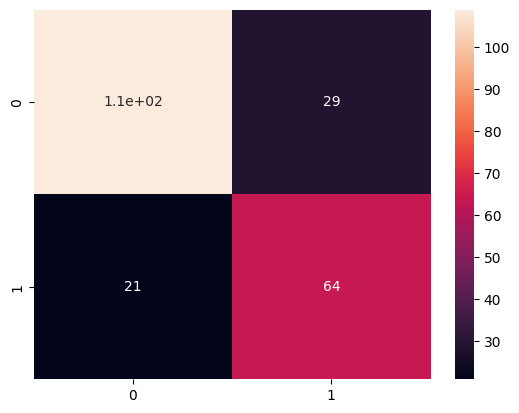

In [94]:
sns.heatmap(con_mat,annot=True)

<AxesSubplot: >

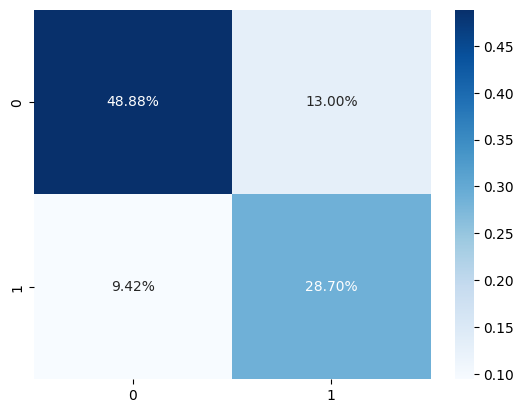

In [95]:
sns.heatmap(con_mat/np.sum(con_mat),annot=True,cmap='Blues',fmt='.2%')